<a href="https://colab.research.google.com/github/viviindahf/Sentiment-Analysis-Jenius/blob/main/Sentiment_Analysis_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing, model_selection, naive_bayes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
# Load the Dataset
from google.colab import files
files.upload()

In [ ]:
data = pd.read_excel('scrapped_data.xlsx')
data.tail(10)

,Score,Label,Content,cleansing,casefolding,tokenizing,normalisasi,stopwords,stemming
3037,5,negatif,"Limit flexi Cash udah revisi 3 X , adakan juga...",NaN,NaN,NaN,NaN,NaN,NaN
3038,5,negatif,Maaf Kenapa Status Akun Saya Tidak Bisa Aktif-...,NaN,NaN,NaN,NaN,NaN,NaN
3039,5,positif,Bank Digital paling TOP dan Komplit Banget pad...,NaN,NaN,NaN,NaN,NaN,NaN
3040,5,positif,Saya hanya ingin mencoba-coba Jenius pada awal...,NaN,NaN,NaN,NaN,NaN,NaN
3041,5,negatif,Makin kesini makin mempersulit jenius buat unl...,NaN,NaN,NaN,NaN,NaN,NaN
3042,5,negatif,Jenius emang gue banget.... Tapi sayang belum ...,NaN,NaN,NaN,NaN,NaN,NaN
3043,5,positif,"Aplikasi bank yang bagus, pemakaiannya juga cu...",NaN,NaN,NaN,NaN,NaN,NaN
3044,5,positif,Sangat bagus dan nyaman menggunakan jenius Pel...,NaN,NaN,NaN,NaN,NaN,NaN
3045,5,positif,Aplikasi yg sangat mudah dan memuaskan dlm ber...,NaN,NaN,NaN,NaN,NaN,NaN
3046,5,negatif,Tolong jika masalah flaxi cash masalah keterla...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        3047 non-null   int64  
 1   Label        3047 non-null   object 
 2   Content      3047 non-null   object 
 3   cleansing    0 non-null      float64
 4   casefolding  0 non-null      float64
 5   tokenizing   0 non-null      float64
 6   normalisasi  0 non-null      float64
 7   stopwords    0 non-null      float64
 8   stemming     0 non-null      float64
dtypes: float64(6), int64(1), object(2)
memory usage: 214.4+ KB


In [ ]:
#remove duplicate
data.drop_duplicates(inplace=True)
data.head()

,Score,Label,Content,cleansing,casefolding,tokenizing,normalisasi,stopwords,stemming
0,1,negatif,Parah cuma gara² ktp saya kusam ga bisa sama s...,NaN,NaN,NaN,NaN,NaN,NaN
1,1,negatif,Bagaimana sih mau daftar terjadi kesalahan ter...,NaN,NaN,NaN,NaN,NaN,NaN
2,1,negatif,"saya tidak pernah meminjam uang di jenius , ti...",NaN,NaN,NaN,NaN,NaN,NaN
3,1,negatif,"Apk nya ribet...sudah di daftar,sudah masukkan...",NaN,NaN,NaN,NaN,NaN,NaN
4,1,negatif,"Makin kesini aplikasinya makin lemot, mau gant...",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(data)

- There are 3011 records after cleaning data process

# Cleaning

In [ ]:
def cleansing(content):
  content = content.strip(" ")
  content = re.sub(r'[?|$|<*².”|!_;"/)(-+,]',' ', content) #menghapus tanda baca
  content = re.sub('[0-9]+', ' ', content)
  content = re.sub("\n"," ", content) #mengganti line baru dengan spasi
  content = re.sub('[^a-zA-Z]',' ',content) #Menghilangkan huruf dan angka
  content = re.sub(r"\b[a-zA-Z]\b", " ", content)
  content = ' '.join(content.split()) #memisahkan dan menggabungkan kata
  return content
data['cleansing'] = data['Content'].apply(cleansing)
data.head(5)

,Score,Label,Content,cleansing,casefolding,tokenizing,normalisasi,stopwords,stemming
0,1,negatif,Parah cuma gara² ktp saya kusam ga bisa sama s...,Parah cuma gara ktp saya kusam ga bisa sama se...,NaN,NaN,NaN,NaN,NaN
1,1,negatif,Bagaimana sih mau daftar terjadi kesalahan ter...,Bagaimana sih mau daftar terjadi kesalahan ter...,NaN,NaN,NaN,NaN,NaN
2,1,negatif,"saya tidak pernah meminjam uang di jenius , ti...",saya tidak pernah meminjam uang di jenius tiba...,NaN,NaN,NaN,NaN,NaN
3,1,negatif,"Apk nya ribet...sudah di daftar,sudah masukkan...",Apk nya ribet sudah di daftar sudah masukkan d...,NaN,NaN,NaN,NaN,NaN
4,1,negatif,"Makin kesini aplikasinya makin lemot, mau gant...",Makin kesini aplikasinya makin lemot mau ganti...,NaN,NaN,NaN,NaN,NaN


# Case Folding

In [ ]:
def casefolding(content):
  content = content.lower()
  return content
data['casefolding'] = data['cleansing'].apply(casefolding)
data.head(10)

,Score,Label,Content,cleansing,casefolding,tokenizing,normalisasi,stopwords,stemming
0,1,negatif,Parah cuma gara² ktp saya kusam ga bisa sama s...,Parah cuma gara ktp saya kusam ga bisa sama se...,parah cuma gara ktp saya kusam ga bisa sama se...,NaN,NaN,NaN,NaN
1,1,negatif,Bagaimana sih mau daftar terjadi kesalahan ter...,Bagaimana sih mau daftar terjadi kesalahan ter...,bagaimana sih mau daftar terjadi kesalahan ter...,NaN,NaN,NaN,NaN
2,1,negatif,"saya tidak pernah meminjam uang di jenius , ti...",saya tidak pernah meminjam uang di jenius tiba...,saya tidak pernah meminjam uang di jenius tiba...,NaN,NaN,NaN,NaN
3,1,negatif,"Apk nya ribet...sudah di daftar,sudah masukkan...",Apk nya ribet sudah di daftar sudah masukkan d...,apk nya ribet sudah di daftar sudah masukkan d...,NaN,NaN,NaN,NaN
4,1,negatif,"Makin kesini aplikasinya makin lemot, mau gant...",Makin kesini aplikasinya makin lemot mau ganti...,makin kesini aplikasinya makin lemot mau ganti...,NaN,NaN,NaN,NaN
5,1,negatif,"Aplikasi bodoh, dengan kebijakan bila pindah H...",Aplikasi bodoh dengan kebijakan bila pindah HP...,aplikasi bodoh dengan kebijakan bila pindah hp...,NaN,NaN,NaN,NaN
6,1,negatif,Lewat 1 hari aja dendanya 150 ribu... Hati hati,Lewat hari aja dendanya ribu Hati hati,lewat hari aja dendanya ribu hati hati,NaN,NaN,NaN,NaN
7,1,negatif,Gagal transfer dan udah ke debet. Proses SLA 6...,Gagal transfer dan udah ke debet Proses SLA ha...,gagal transfer dan udah ke debet proses sla ha...,NaN,NaN,NaN,NaN
8,1,negatif,Tidak rekomended.... Selalu tetap berhati² ter...,Tidak rekomended Selalu tetap berhati terhadap...,tidak rekomended selalu tetap berhati terhadap...,NaN,NaN,NaN,NaN
9,1,negatif,Gak jelas habis video call buat verifikasi dat...,Gak jelas habis video call buat verifikasi dat...,gak jelas habis video call buat verifikasi dat...,NaN,NaN,NaN,NaN


# Tokenization

In [ ]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer(r'[\w+|$[0-9]+|\s+,]')
data['tokenizing'] = data['casefolding'].apply(regexp.tokenize)
data.head(10)

,Score,Label,Content,cleansing,casefolding,tokenizing,normalisasi,stopwords,stemming
0,1,negatif,Parah cuma gara² ktp saya kusam ga bisa sama s...,Parah cuma gara ktp saya kusam ga bisa sama se...,parah cuma gara ktp saya kusam ga bisa sama se...,"[parah, cuma, gara, ktp, saya, kusam, ga, bisa...",NaN,NaN,NaN
1,1,negatif,Bagaimana sih mau daftar terjadi kesalahan ter...,Bagaimana sih mau daftar terjadi kesalahan ter...,bagaimana sih mau daftar terjadi kesalahan ter...,"[bagaimana, sih, mau, daftar, terjadi, kesalah...",NaN,NaN,NaN
2,1,negatif,"saya tidak pernah meminjam uang di jenius , ti...",saya tidak pernah meminjam uang di jenius tiba...,saya tidak pernah meminjam uang di jenius tiba...,"[saya, tidak, pernah, meminjam, uang, di, jeni...",NaN,NaN,NaN
3,1,negatif,"Apk nya ribet...sudah di daftar,sudah masukkan...",Apk nya ribet sudah di daftar sudah masukkan d...,apk nya ribet sudah di daftar sudah masukkan d...,"[apk, nya, ribet, sudah, di, daftar, sudah, ma...",NaN,NaN,NaN
4,1,negatif,"Makin kesini aplikasinya makin lemot, mau gant...",Makin kesini aplikasinya makin lemot mau ganti...,makin kesini aplikasinya makin lemot mau ganti...,"[makin, kesini, aplikasinya, makin, lemot, mau...",NaN,NaN,NaN
5,1,negatif,"Aplikasi bodoh, dengan kebijakan bila pindah H...",Aplikasi bodoh dengan kebijakan bila pindah HP...,aplikasi bodoh dengan kebijakan bila pindah hp...,"[aplikasi, bodoh, dengan, kebijakan, bila, pin...",NaN,NaN,NaN
6,1,negatif,Lewat 1 hari aja dendanya 150 ribu... Hati hati,Lewat hari aja dendanya ribu Hati hati,lewat hari aja dendanya ribu hati hati,"[lewat, hari, aja, dendanya, ribu, hati, hati]",NaN,NaN,NaN
7,1,negatif,Gagal transfer dan udah ke debet. Proses SLA 6...,Gagal transfer dan udah ke debet Proses SLA ha...,gagal transfer dan udah ke debet proses sla ha...,"[gagal, transfer, dan, udah, ke, debet, proses...",NaN,NaN,NaN
8,1,negatif,Tidak rekomended.... Selalu tetap berhati² ter...,Tidak rekomended Selalu tetap berhati terhadap...,tidak rekomended selalu tetap berhati terhadap...,"[tidak, rekomended, selalu, tetap, berhati, te...",NaN,NaN,NaN
9,1,negatif,Gak jelas habis video call buat verifikasi dat...,Gak jelas habis video call buat verifikasi dat...,gak jelas habis video call buat verifikasi dat...,"[gak, jelas, habis, video, call, buat, verifik...",NaN,NaN,NaN


# **Normalisasi**

In [ ]:
!pip install nltk

normalized_word = pd.read_csv('Kamus Normalisasi.csv', encoding='latin1')

normalized_word_dict={"tau" : "tahu", "gajelas" : "tidak jelas", "update" : "memperbarui", "taunya" : "tahunya",
                      "free" : "gratis", "comfy" : "nyaman","deposit" : "deposito", "hape " : "ponsel", "super" : "sangat","pencet" : "tekan", "ngilang" : "menghilang", "narik" : "menarik",
                      "luv" : "love", "tf" : "transfer", "ngejar" : "mengejar", "abis":"habis", "ad":"ada", "aja" : "saja", "aktifitas" : "aktivitas", "ancur"	: "hancur", "and": "dan", "akuu" : "saya",
                      "acc" : "terima", "antri" : "antre", "apaan": "apa", "apk": "aplikasi", "app": "aplikasi", "aku" : "saya", "acount" : "akun",
                      "apps" : "aplikasi","appnya": "aplikasinya", "asik" :	"asyik", "auto" : "otomatis", "automatis" : "otomatis",
                      "ayok": "ayo", "agak": "sedikit", "account" : "akun", "aplikas" : "aplikasi", "ajib" : "menakjubkan", "aktifitasnya" : "aktivitasnya", "ativasi" : "aktivasi",
                      "baguss" : "bagus", "bakalan": "akan","bales": "balas", "ampe" : "sampai", "bangeet" : "banget", "bangett" : "banget", "biar" : "agar",
                      "bener" : "benar", "bangking" : "banking", "beres" : "selesai", "best": "terbaik",
                      "bestt": "terbaik", "bnr" : "benar", "besttt": "terbaik", "boring" : "membosankan",
                      "betul" : "benar", "bangettt" : "banget","bgt": "banget", "bangeet" : "banget", "bang" : "bank", "bangett": "banget",
  "bocil" : "anak kecil","bikin":	"buat", "bestie" : "sahabat", "bnget": "banget", "bngt"	: "banget", "byk" : "banyak", "banyakkkk" : "banyak",
  "bnyak" : "banyak", "bnyk":"banyak","buran" : "cepetan","bosen" : "bosan","bravo"	: "baik sekali","applikasi" : "aplikasi","bs": "bisa",
  "byk": "banyak","camera" : "kamera","confirm" : "konfirmasi","cc" : "kartu kredit","credit card" : "kartu kredit","credit" : "kredit",
  "card" : "kartu","capek"	: "lelah","cash" : "tunai","call center" : "pusat panggilan","debit card" : "kartu debit","call" : "panggilan",
  "cs" : "customer service","cimb niaga" : "cimb niaga",
  "cepet"	: "cepat",
  "charge": "biaya",
  "cakep" : "bagus",
  "crew" : "kru",
  "chill" : "santai",
  "cuku" : "cukup",
  "cuman":"hanya",
  "deket"	: "dekat",
  "d": "di",
  "de" : "deh",
  "dah" : "sudah",
  "dpt": "dapat",
  "dapt":"dapat",
  "date": "tanggal",
  "dateng" : "datang",
  "dev" : "developer",
  "dehh":"deh",
  "donk" : "dong",
  "design" : "desain",
  "deket" : "dekat",
  "dengerin":"mendengarkan",
  "dg":"dengan",
  "dgn":"dengan",
  "disono" : "di sana",
  "dikit" : "sedikit",
  "dl":"dulu",
  "dll":"dan lain lain",
  "debit card" : "kartu debit",
  "debitcard" : "kartu debit",
  "dlm":"dalam",
  "dlu":"dulu",
  "dn": "dan",
  "doang":"saja",
  "digunakann" : "digunakan",
  "doi" : "kekasih",
  "denger" : "dengar",
  "donlot":"unduh",
  "dowload" : "unduh",
  "download": "unduh",
  "donlod" : "unduh",
  "daebak" : "keren",
  "dpt": "dapat",
  "dapet" : "dapat",
  "dpat":	"dapat", "dr" : "dari",
  "dri" : "dari", "drmana": "darimana","dsb" : "dan sebagainya","duh" :	"aduh", "duit": "uang",
  "emg" : "memang", "emang" : "memang",
  "engga" : "tidak",
  "entar"	: "nanti",
  "enjoy" : "menikmati",
  "easy to use" : "mudah digunakan",
  "e money" : "electronic money",
  "ewalet": "electronic wallet",
  "ewallet" : "electronic wallet",
  "elegant" : "elegan",
  "experience" : "pengalaman",
  "fix" : "menetapkan",
  "fee" : "biaya",
  "financial" : "finansial",
  "flexy" : "flexi",
  "free" :	"gratis",
  "fresh"	: "segar",
  "ft" :"foto",
  "fto":"foto",
  "flow" : "arus",
  "full" : "penuh",
  "for" : "untuk",
  "flaxi" : "flexi",
  "flexible" : "fleksibel",
  "flexibel" : "fleksibel",
  "fitu" : "fitur",
  "ga" : "tidak",
  "gajadi" : "tidak jadi",
  "gaada": "tidak ada",
  "gabisa" : "tidak bisa",
  "gaes" :"teman teman",
  "gausah" : "tidak usah",
  "gaperlu" : "tidak perlu",
  "gaje" : "tidak jelas",
  "gak": "tidak",
  "gak papa": "tidak apa apa",
  "gunain" : "gunakan",
  "game" : "permainan",
  "gapapa" : "tidak apa apa",
  "gatau"	:"tidak tahu",
  "guys": "teman teman",
  "gede" : "besar",
  "gaje" : "tidak jelas",
  "genius" : "jenius",
  "ghoib"	: "gaib", "gimana": "bagaimana","gini": "begini", "gitu": "begitu",
  "gj":"tidak jelas",
  "gk" : "tidak",
  "gampang" : "mudah",
  "gimana" : "bagaimana",
  "good"	: "bagus",
  "gokil" : "keren",
  "gt" : "begitu",
  "gua" :	"saya",
  "gue" : "saya",
  "guys":	"teman teman",
  "gw":"saya",
  "hallo bca" : "halo bca",
  "hape" : "ponsel",
  "happy": "senang",
  "hny" :	"hanya",
  "hnya" : "hanya",
  "hp" : "ponsel",
  "ilang"	: "hilang",
  "instal" : "instalasi",
  "install" : "instalasi",
  "imel": "email",
  "inii" : "ini",
  "info": "informasi",
  "item": "barang",
  "iu" : "user interface",
  "ix" : "user experience",
  "iy" : "ya",
  "invest" : "investasi",
  "inj" : "ini",
  "jaman" : "zaman",
  "jd" : "jadi",
  "jdi" : "jadi",
  "jg" :	"juga",
  "jga" :	"juga",
  "jugaaaa" : "juga",
  "jgn"	: "jangan",
  "job" : "pekerjaan",
  "kaga"	: "tidak",
  "kerjaa" : "kerja",
  "kalii" :	"kali",
  "kos" : "indekos",
  "kalo" :	"kalau",
  "karna" : "karena",
  "kayanya" : "kayaknya",
  "kek":"kayak",
  "kaya" : "kayak",
  "keknya":"kayaknya",
  "keliatan":"kelihatan",
  "kereen" : "keren",
  "kereeen" : "keren",
  "kerenn" : "keren",
  "kerennn" : "keren",
  "kesel":"kesal",
  "kesini":"ke sini",
  "ket":"keterangan",
  "kl":"kalau",
  "klian":	"kalian",
  "klo":"kalau",
  "km":"kamu",
  "kn":"kan",
  "komen" : "komentar",
  "komplit" : "komplet",
  "kpn":"kapan",
  "krg":"kurang",
  "krn" : "karena",
  "kasi" : "kasih",
  "krna" :	"karena",
  "kt" : "kita",
  "kedepanya" : "kedepannya",
  "kayak" : "seperti",
  "ky" : "seperti",
  "kyk" : "seperti",
  "lagiii" : "lagi",
  "lbh" : "lebih",
  "lainny" : "lainnya",
  "lansun" : "langsung",
  "lelet" : "lambat",
  "lemot"	: "lambat",
  "lagii" : "lagi",
  "lg":"lagi",
  "lgi":"lagi",
  "lps" : "lembaga penjamin simpanan",
  "lgkp":"lengkap", "langsun" : "langsung",
  "lgs":"langsung",
  "lgsg":"langsung",
  "lgsung":"langsung",
  "lho":"loh",
  "lhoo" : "loh",
  "lht":"lihat",
  "liat":"lihat",
  "lebiih" : "lebih",
  "males" : "malas",
  "mbaking" : "mobile banking", "mbanking" : "mobile banking", "mbkanking" : "mobile banking", "mbankin" : "mobile banking", "mobile banking" : "mobile banking", "mbank" : "mobile banking",
  "msh" : "masih",
  "mager" : "malas",
  "mau" : "ingin",
  "makasi" : "terima kasih", "makasih" : "terima kasih",
  "macem": "macam",
  "melalukan" : "melakukan",
  "makasih" : "terima kasih",
  "manage" : "mengelola",
  "mudah" : "tidak mudah",
  "bagus" : "tidak bagus",
  "maksa" : "memaksa",
  "make" : "pakai",
  "mageran" : "malas",
  "malah": "bahkan",
  "memudahka" : "mempermudah",
  "mantab" : "mantap",
  "mantapp" : "mantap",
  "mantappp" : "mantap",
  "mantep" : "mantap",
  "mantul" : "mantap",
  "mantulita" : "mantap",
  "mantulitaa" : "mantap",
  "money" : "uang",
  "masi"	: "masih",
  "menabun" : "menabung",
  "mayan" : "lumayan",
  "mba"	: "mbak",
  "mudh" : "mudah",
  "mending" : "lebih baik",
  "manajamen" : "manajemen",
  "nabung" : "menabung",
  "mulu"	: "melulu",
  "ngetik" : "mengetik",
  "nambah": "tambah",
  "ngelakuin" : "melakukan",
  "nanya"	: "bertanya",
  "napa" : "kenapa",
  "nelfon": "menelepon",
  "nelpon": "menelepon",
  "nemu" : "menemukan",
  "netfix" : "netflix",
  "neflik" : "netflix",
  "netflik" : "netflix",
  "netfilx" : "netflix",
  "nexflix" : "netflix",
  "ngak" : "tidak",
  "ngambil" : "mengambil",
  "ngapain" : "sedang apa",
  "ngasih" : "memberikan",
  "nyuri" : "mencuri",
  "ngga"	: "tidak",
  "nggak" : "tidak",
  "nggk" : "tidak",
  "ngelola" : "mengelola",
  "ngisi"	: "mengisi",
  "ngk" : "tidak",
  "ngurus" : "mengurus",
  "ni" : "ini",
  "nih" : "ini",
  "niih" : "ini",
  "ngirim" : "mengirim",
  "no": "nomor",
  "nomer": "nomor",
  "ngebosenin" : "membosankan",
  "ngajuin" : "mengajukan",
  "nunggu" : "menunggu",
  "nyari" : "mencari",
  "nyesel": "menyesal",
  "notif" : "notifikasi",
  "nyimpan" : "simpan",
  "nyoba" : "coba",
  "nyman":"nyaman",
  "nymn":"nyaman",
  "on" : "pada",
  "organize" : "mengatur",
  "ojk" : "otoritas jasa keuangan",
  "ok" : "oke",
  "okeee":"oke",
  "okeh":	"oke",
  "okey":	"oke",
  "orng":	"orang",
  "org":"orang",
  "onlineshop" : "toko online",
  "online shop" : "toko online",
  "over protective" : "overprotective",
  "opening" : "pembukaan",
  "otp" : "one time password",
  "overall": "secara keseluruhan",
  "pake": "pakai",
  "pengembang" : "developer",
  "pas" : "saat",
  "pakek":"pakai",
  "pdhl":	"padahal",
  "pengen" : "ingin",
  "pgn":"ingin",
  "photo" : "foto",
  "pokokny" : "pokoknya",
  "pke": "pakai",
  "pny":"punya",
  "poko" : "pokok",
  "pokonya" : "pokoknya",
  "pengguna" : "user",
  "poto" : "foto",
  "pol" : "sangat",
  "poll" : "sangat",
  "planning" : "perencanaan",
  "plan":"rencana",
  "prnh":"pernah",
  "pnya" : "punya",
  "pst":"pasti",
  "psti":"pasti",
  "pw" : "kata sandi",
  "pd" : "pada", "pda" : "pada",
  "pass" : "kata sandi",
  "pasword" : "kata sandi",
  "password" : "kata sandi",
  "qr" : "quick response",
  "ramaiii":"ramai",
  "rek" : "rekening",
  "rada" : "agak",
  "rb" : "ribu",
  "regist" : "registrasi",
  "resolve" : "menyelesaikan",
  "recomend": "rekomendasi",
  "recomen": "rekomendasi",
  "remkomen" : "rekomendasi",
  "recommend" : "rekomendasi",
  "recomended" : "rekomendasi",
  "reccomended" : "rekomendasi",
  "recommended": "rekomendasi",
  "rekomen" : "rekomendasi",
  "rekomend" : "rekomendasi",
  "register": "registrasi",
  "registasi" : "registrasi",
  "rekomended" : "rekomendasi",
  "repayment" : "pembayaran kembali",
  "session" : "sesi",
  "system" : "sistem",
  "safe" : "aman",
  "sampe":"sampai",
  "sbg": "sebagai",
  "sblm":	"sebelum",
  "sbnrny" : "sebenarnya",
  "sebsar":"sebesar",
  "sm" : "sama",
  "sdh" : "sudah",
  "sdkt":"sedikit",
  "sdngkn":"sedangkan",
  "sebel":"kesal",
  "sebal":"kesal",
  "sperti" : "seperti",
  "security": "keamanan",
  "sekedar":"sekadar",
  "seneng": "senang",
  "seruu":	"seru",
  "shless" : "cashless",
  "service":"servis",
  "si" : "sih",
  "sii":"sih",
  "stop": "berhenti",
  "solution" : "solusi", "subscribe" : "berlangganan",
  "simple" : "simpel",
  "simplee" : "simpel",
  "simpleee": "simpel",
  "simcard" : "kartu sim",
  "save" : "menyimpan",
  "send" : "mengirim",
  "safety" : "aman",
  "stay" : "tetap",
  "sj" :"saja",
  "skali":"sekali",
  "skalian":"sekalian",
  "skrg":"sekarang",
  "skrng"	:"sekarang",
  "smart"	: "pintar",
  "smartphone" : "ponsel pintar",
  "sportify" : "spotify",
  "sporify" : "spotify",
  "spoifty" : "spotify", "spotifay" : "spotify",
  "sporty" : "spotify",
  "spotifi" : "spotify",
  "spt" : "seperti",
  "stlh ":	"setelah",
  "suda" : "sudah", "sportify": "spotify", "sporti"	: "spotify",
  "sy": "saya", "sya" : "saya", "this" : "ini",
  "tak" : "tidak", "tar" : "nanti",
  "trf" : "transfer", "trasnfer" : "transfer", "tau" : "tahu", "to" : "untuk", "td" : "tadi", "tdk" : "tidak",
  "telat" :	"terlambat", "time out" : "waktu habis", "sesi habis" : "waktu habis",
  "telpon" : "telepon", "tlp" : "telepon", "telp":"telepon", "temen" : "teman","terimakasih" :	"terima kasih","thanku" : "terima kasih",
  "tranfer" : "transfer", "tetep"	: "tetap", "tgl" : "tanggal", "thank": "terima kasih", "thankyou" : "terima kasih", "thanks" : "terima kasih", "top up":"topup",
  "thn":"tahun", "tp" : "tapi", "tpi" : "tapi", "trs" : "terus", "tampila" : "tampilan", "tersimple" : "tersimpel",
  "trus" : "terus", "tsb" : "tersebut", "tuh" : "itu", "udah"	: "sudah", "uninstal" : "uninstall",
  "user friendly" : "userfriendly", "ui": "userinterface", "ux" : "userexperience", "unlink device" : "unlink device",
  "udh" : "sudah", "uda" : "sudah", "untk"	: "untuk", "upgrade": "ditingkatkan", "upload" : "mengunggah", "usah"	: "perlu",
  "utk": "untuk", "vidio call" : "videocall", "videocall" : "videocall", "vicall":"videocall", "vidiocall" : "videocall",
  "vidcall" : "video call", "vc" : "videocall", "vcall" : "videocall", "vidio": "video", "very" : "sangat",
  "verifikas" : "verifikasi", "vid" : "video", "vitur" : "fitur", "valas" : "valuta asing", "via" : "melalui",
  "verif" : "verifikasi", "woww" : "wow", "wowww" : "wow", "wowwww" : "wow", "wahh" : "wow", "wahhh" : "wow", "wahhhh" : "wow", "worth it": "sepadan",
  "x" : "kali","yaa":"ya","yaudah": "ya sudah","yg" : "yang", "ayok" : "ayo", "yuk" : "ayo", "yaaa" : "ya", "nyoba" : "coba"
  }

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[0]

def normalized_term(document):
    return[normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

data['normalisasi'] = data['tokenizing'].apply(normalized_term)
data.head(10)

#Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')
txt_stopwords = pd.read_csv("stopwords.txt", names=["stopwords"], header = None)

list_stopwords.extend(["lohh","intinya","klau","dong","lope","ngebuat","situ","itupun", "banget", "hadeh", "gada", "jugaa", "gabakal",
                       "maksud", "apanya", "persis", "aduh", "ya sudah", "tinggal", "teman teman", "pantes", "kemarin", "me","je","ih",
                       "mbak", "ujungnya", "melulu", "hmmm", "terkadang", "sudah", "tolol", "belas", "manapun", "nyaa", "yaudahlah", "selain",
                       "bner", "sumpah", "kaya", "setau", "tanggal", "teman", "puluh", "lohhh", "iyah", "bolakbalik", "lain", "okay",
                       "aj","ko","min","dh","in","ath","teh","ituuu","nge","gni","bah","loh","bgtt","ku","la","kah", "cus","ak","widiw",
                       "ah", "rp", "iya", "lol", "hi", "mas", "mbak","unt","so","at","yak","al","is", "meng", "oiya", "yuhu", "yaampun"
                       "gegara", "gak perlu", "siip", "please", "pakai", "satset", "terus", "masyaallah", "alhamdulillah", "ohiya", "alhamdulilah"])
list_stopwords.extend(txt_stopwords["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(text):
    text = [word for word in text if word not in list_stopwords]
    return text
data['stopwords'] = data['normalisasi'].apply(stopwords_removal)
data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Score,Label,Content,cleansing,casefolding,tokenizing,normalisasi,stopwords,stemming
0,1,negatif,Parah cuma gara² ktp saya kusam ga bisa sama s...,Parah cuma gara ktp saya kusam ga bisa sama se...,parah cuma gara ktp saya kusam ga bisa sama se...,"[parah, cuma, gara, ktp, saya, kusam, ga, bisa...","[parah, cuma, gara, ktp, saya, kusam, tidak, b...","[parah, gara, ktp, kusam, aktivasi, video, pan...",NaN
1,1,negatif,Bagaimana sih mau daftar terjadi kesalahan ter...,Bagaimana sih mau daftar terjadi kesalahan ter...,bagaimana sih mau daftar terjadi kesalahan ter...,"[bagaimana, sih, mau, daftar, terjadi, kesalah...","[bagaimana, sih, ingin, daftar, terjadi, kesal...","[sih, daftar, kesalahan, memasukan, data]",NaN
2,1,negatif,"saya tidak pernah meminjam uang di jenius , ti...",saya tidak pernah meminjam uang di jenius tiba...,saya tidak pernah meminjam uang di jenius tiba...,"[saya, tidak, pernah, meminjam, uang, di, jeni...","[saya, tidak, pernah, meminjam, uang, di, jeni...","[meminjam, uang, jenius, email, mengembalikan,...",NaN
3,1,negatif,"Apk nya ribet...sudah di daftar,sudah masukkan...",Apk nya ribet sudah di daftar sudah masukkan d...,apk nya ribet sudah di daftar sudah masukkan d...,"[apk, nya, ribet, sudah, di, daftar, sudah, ma...","[aplikasi, nya, ribet, sudah, di, daftar, suda...","[aplikasi, nya, ribet, daftar, masukkan, data,...",NaN
4,1,negatif,"Makin kesini aplikasinya makin lemot, mau gant...",Makin kesini aplikasinya makin lemot mau ganti...,makin kesini aplikasinya makin lemot mau ganti...,"[makin, kesini, aplikasinya, makin, lemot, mau...","[makin, ke sini, aplikasinya, makin, lambat, i...","[ke sini, aplikasinya, lambat, ganti, device, ...",NaN
5,1,negatif,"Aplikasi bodoh, dengan kebijakan bila pindah H...",Aplikasi bodoh dengan kebijakan bila pindah HP...,aplikasi bodoh dengan kebijakan bila pindah hp...,"[aplikasi, bodoh, dengan, kebijakan, bila, pin...","[aplikasi, bodoh, dengan, kebijakan, bila, pin...","[aplikasi, bodoh, kebijakan, pindah, ponsel, d...",NaN
6,1,negatif,Lewat 1 hari aja dendanya 150 ribu... Hati hati,Lewat hari aja dendanya ribu Hati hati,lewat hari aja dendanya ribu hati hati,"[lewat, hari, aja, dendanya, ribu, hati, hati]","[lewat, hari, saja, dendanya, ribu, hati, hati]","[dendanya, ribu, hati, hati]",NaN
7,1,negatif,Gagal transfer dan udah ke debet. Proses SLA 6...,Gagal transfer dan udah ke debet Proses SLA ha...,gagal transfer dan udah ke debet proses sla ha...,"[gagal, transfer, dan, udah, ke, debet, proses...","[gagal, transfer, dan, sudah, ke, debet, prose...","[gagal, transfer, debet, proses, sla, kerja, k...",NaN
8,1,negatif,Tidak rekomended.... Selalu tetap berhati² ter...,Tidak rekomended Selalu tetap berhati terhadap...,tidak rekomended selalu tetap berhati terhadap...,"[tidak, rekomended, selalu, tetap, berhati, te...","[tidak, rekomendasi, selalu, tetap, berhati, t...","[rekomendasi, berhati, bentuk, iming, bank]",NaN
9,1,negatif,Gak jelas habis video call buat verifikasi dat...,Gak jelas habis video call buat verifikasi dat...,gak jelas habis video call buat verifikasi dat...,"[gak, jelas, habis, video, call, buat, verifik...","[tidak, jelas, habis, video, panggilan, buat, ...","[habis, video, panggilan, verifikasi, data, ap...",NaN


# **Stemming**

In [ ]:
!pip install PySastrawi
!pip install swifter

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['stopwords']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print('------------------------')

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":", term_dict[term])

print(len(term_dict))
print('------------------------')
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['stemming'] = data['stopwords'].swifter.apply(get_stemmed_term)

2705
------------------------
parah : parah
gara : gara
ktp : ktp
kusam : kusam
aktivasi : aktivasi
video : video
panggilan : panggil
kali : kali
sih : sih
daftar : daftar
kesalahan : salah
memasukan : pasu
data : data
meminjam : pinjam
uang : uang
jenius : jenius
email : email
mengembalikan : kembali
pinjam : pinjam
menyalahgunakan : menyalahgunakan
orang : orang
bawa : bawa
hukum : hukum
aplikasi : aplikasi
nya : nya
ribet : ribet
masukkan : masuk
masuk : masuk
koneksi : koneksi
terputus : putus
silahkan : silah
login : login
berulang : ulang
ulang : ulang
ambil : ambil
ade : ade
tagihan : tagih
bertanggung : tanggung
tolong : tolong
hapus : hapus
ke sini : ke sini
aplikasinya : aplikasi
lambat : lambat
ganti : ganti
device : device
tidak bisa : tidak bisa
telepon : telepon
kesana : kesana
kemari : kemari
belom : bom
disuruh : suruh
tunggu : tunggu
ngabisin : ngabisin
pulsa : pulsa
bodoh : bodoh
kebijakan : bijak
pindah : pindah
ponsel : ponsel
namanya : nama
mempermudah : mudah
memp

Pandas Apply:   0%|          | 0/3011 [00:00<?, ?it/s]

In [ ]:
data['ulasan_clean'] = data['stemming'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
data.head(100)

,Score,Label,Content,cleansing,casefolding,tokenizing,normalisasi,stopwords,stemming,ulasan_clean
0,1,negatif,Parah cuma gara² ktp saya kusam ga bisa sama s...,Parah cuma gara ktp saya kusam ga bisa sama se...,parah cuma gara ktp saya kusam ga bisa sama se...,"[parah, cuma, gara, ktp, saya, kusam, ga, bisa...","[parah, cuma, gara, ktp, saya, kusam, tidak, b...","[parah, gara, ktp, kusam, aktivasi, video, pan...","[parah, gara, ktp, kusam, aktivasi, video, pan...",parah gara kusam aktivasi video panggil kali
1,1,negatif,Bagaimana sih mau daftar terjadi kesalahan ter...,Bagaimana sih mau daftar terjadi kesalahan ter...,bagaimana sih mau daftar terjadi kesalahan ter...,"[bagaimana, sih, mau, daftar, terjadi, kesalah...","[bagaimana, sih, ingin, daftar, terjadi, kesal...","[sih, daftar, kesalahan, memasukan, data]","[sih, daftar, salah, pasu, data]",daftar salah pasu data
2,1,negatif,"saya tidak pernah meminjam uang di jenius , ti...",saya tidak pernah meminjam uang di jenius tiba...,saya tidak pernah meminjam uang di jenius tiba...,"[saya, tidak, pernah, meminjam, uang, di, jeni...","[saya, tidak, pernah, meminjam, uang, di, jeni...","[meminjam, uang, jenius, email, mengembalikan,...","[pinjam, uang, jenius, email, kembali, uang, p...",pinjam uang jenius email kembali uang pinjam m...
3,1,negatif,"Apk nya ribet...sudah di daftar,sudah masukkan...",Apk nya ribet sudah di daftar sudah masukkan d...,apk nya ribet sudah di daftar sudah masukkan d...,"[apk, nya, ribet, sudah, di, daftar, sudah, ma...","[aplikasi, nya, ribet, sudah, di, daftar, suda...","[aplikasi, nya, ribet, daftar, masukkan, data,...","[aplikasi, nya, ribet, daftar, masuk, data, da...",aplikasi ribet daftar masuk data data masuk ap...
4,1,negatif,"Makin kesini aplikasinya makin lemot, mau gant...",Makin kesini aplikasinya makin lemot mau ganti...,makin kesini aplikasinya makin lemot mau ganti...,"[makin, kesini, aplikasinya, makin, lemot, mau...","[makin, ke sini, aplikasinya, makin, lambat, i...","[ke sini, aplikasinya, lambat, ganti, device, ...","[ke sini, aplikasi, lambat, ganti, device, tid...",ke sini aplikasi lambat ganti device tidak bis...
...,...,...,...,...,...,...,...,...,...,...
95,1,negatif,"Buka app nya berat bgt, muter2 aja terus padah...",Buka app nya berat bgt muter aja terus padahal...,buka app nya berat bgt muter aja terus padahal...,"[buka, app, nya, berat, bgt, muter, aja, terus...","[buka, aplikasi, nya, berat, banget, muter, sa...","[buka, aplikasi, nya, berat, muter, ponsel, si...","[buka, aplikasi, nya, berat, muter, ponsel, si...",buka aplikasi berat muter ponsel sinyal wifi p...
96,1,negatif,Jadi males pake jenius mending lagi urgen mala...,Jadi males pake jenius mending lagi urgen mala...,jadi males pake jenius mending lagi urgen mala...,"[jadi, males, pake, jenius, mending, lagi, urg...","[jadi, malas, pakai, jenius, lebih baik, lagi,...","[malas, jenius, lebih baik, urgen]","[malas, jenius, lebih baik, urgen]",malas jenius lebih baik urgen
97,1,negatif,"Jenius hari ini error, selalu force close.",Jenius hari ini error selalu force close,jenius hari ini error selalu force close,"[jenius, hari, ini, error, selalu, force, close]","[jenius, hari, ini, error, selalu, force, close]","[jenius, error, force, close]","[jenius, error, force, close]",jenius error force close
98,1,negatif,Sering keluar sendiri. Lucu parah,Sering keluar sendiri Lucu parah,sering keluar sendiri lucu parah,"[sering, keluar, sendiri, lucu, parah]","[sering, keluar, sendiri, lucu, parah]","[lucu, parah]","[lucu, parah]",lucu parah


In [ ]:
#menyimpan data bersih
data.to_csv('data_bersih.csv', encoding='utf8', index=False)

# **Klasifikasi Naive Bayes**

In [ ]:
data_clean = pd.read_csv('data_bersih.csv')
data_clean.head()

,Score,Label,Content,cleansing,casefolding,tokenizing,normalisasi,stopwords,stemming,ulasan_clean
0,1,negatif,Parah cuma gara² ktp saya kusam ga bisa sama s...,Parah cuma gara ktp saya kusam ga bisa sama se...,parah cuma gara ktp saya kusam ga bisa sama se...,"['parah', 'cuma', 'gara', 'ktp', 'saya', 'kusa...","['parah', 'cuma', 'gara', 'ktp', 'saya', 'kusa...","['parah', 'gara', 'ktp', 'kusam', 'aktivasi', ...","['parah', 'gara', 'ktp', 'kusam', 'aktivasi', ...",parah gara kusam aktivasi video panggil kali
1,1,negatif,Bagaimana sih mau daftar terjadi kesalahan ter...,Bagaimana sih mau daftar terjadi kesalahan ter...,bagaimana sih mau daftar terjadi kesalahan ter...,"['bagaimana', 'sih', 'mau', 'daftar', 'terjadi...","['bagaimana', 'sih', 'ingin', 'daftar', 'terja...","['sih', 'daftar', 'kesalahan', 'memasukan', 'd...","['sih', 'daftar', 'salah', 'pasu', 'data']",daftar salah pasu data
2,1,negatif,"saya tidak pernah meminjam uang di jenius , ti...",saya tidak pernah meminjam uang di jenius tiba...,saya tidak pernah meminjam uang di jenius tiba...,"['saya', 'tidak', 'pernah', 'meminjam', 'uang'...","['saya', 'tidak', 'pernah', 'meminjam', 'uang'...","['meminjam', 'uang', 'jenius', 'email', 'menge...","['pinjam', 'uang', 'jenius', 'email', 'kembali...",pinjam uang jenius email kembali uang pinjam m...
3,1,negatif,"Apk nya ribet...sudah di daftar,sudah masukkan...",Apk nya ribet sudah di daftar sudah masukkan d...,apk nya ribet sudah di daftar sudah masukkan d...,"['apk', 'nya', 'ribet', 'sudah', 'di', 'daftar...","['aplikasi', 'nya', 'ribet', 'sudah', 'di', 'd...","['aplikasi', 'nya', 'ribet', 'daftar', 'masukk...","['aplikasi', 'nya', 'ribet', 'daftar', 'masuk'...",aplikasi ribet daftar masuk data data masuk ap...
4,1,negatif,"Makin kesini aplikasinya makin lemot, mau gant...",Makin kesini aplikasinya makin lemot mau ganti...,makin kesini aplikasinya makin lemot mau ganti...,"['makin', 'kesini', 'aplikasinya', 'makin', 'l...","['makin', 'ke sini', 'aplikasinya', 'makin', '...","['ke sini', 'aplikasinya', 'lambat', 'ganti', ...","['ke sini', 'aplikasi', 'lambat', 'ganti', 'de...",ke sini aplikasi lambat ganti device tidak bis...


In [ ]:
data_clean = data_clean.drop(columns=['Score', 'Content', 'cleansing', 'casefolding','tokenizing','normalisasi','stopwords','stemming'])
data_clean

,Label,ulasan_clean
0,negatif,parah gara kusam aktivasi video panggil kali
1,negatif,daftar salah pasu data
2,negatif,pinjam uang jenius email kembali uang pinjam m...
3,negatif,aplikasi ribet daftar masuk data data masuk ap...
4,negatif,ke sini aplikasi lambat ganti device tidak bis...
...,...,...
3006,negatif,jenius sayang kartu kredit flexi tunai
3007,positif,aplikasi bank bagus pakai lumayan mudah
3008,positif,bagus nyaman jenius layan cepat tanggap suka j...
3009,positif,aplikasi mudah muas transaksi


In [ ]:
#Transformasi Sentiment Variabel menjadi Numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data_clean['Label'] = label_encoder.fit_transform(data_clean['Label'])
data_clean.head(10)

,Label,ulasan_clean
0,0,parah gara kusam aktivasi video panggil kali
1,0,daftar salah pasu data
2,0,pinjam uang jenius email kembali uang pinjam m...
3,0,aplikasi ribet daftar masuk data data masuk ap...
4,0,ke sini aplikasi lambat ganti device tidak bis...
5,0,aplikasi bodoh bijak pindah ponsel device nama...
6,0,denda ribu hati hati
7,0,gagal transfer debet proses kerja jadi kali un...
8,0,rekomendasi hati bentuk iming bank
9,0,habis video panggil verifikasi data aplikasi m...


# TF-IDF

In [ ]:
#install scikit-learn library
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(data_clean['ulasan_clean']).toarray()

df_tf = pd.DataFrame(x_tfidf, columns = tfidf.get_feature_names_out())
df_tf

,abal,acak,acara,active,ada,adakan,adaptasi,adik,adil,admin,...,whatsup,wifi,worth,xiaomi,yaampun,yauda,yenna,youtube,zaman,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = x_tfidf
y = data_clean['Label']

# Splitting Dataset

**70:30**

In [ ]:
#splitting data training dan data testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2107, 1700)
(904, 1700)
(2107,)
(904,)


In [ ]:
#Pemodelan Naive BAyes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier = GaussianNB().fit(x_train, y_train)
predicted = classifier.predict(x_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, predicted))
print("GaussianNB Precision:", precision_score(y_test, predicted, average="binary", pos_label=0))
print("GaussianNB Recall:", recall_score(y_test, predicted, average="binary", pos_label=0))
print("GaussianNB F1_Score:", f1_score(y_test, predicted, average="binary", pos_label=0))

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

GaussianNB Accuracy: 0.8971238938053098
GaussianNB Precision: 0.93646408839779
GaussianNB Recall: 0.8288508557457213
GaussianNB F1_Score: 0.8793774319066148
confusion matrix:
 [[339  70]
 [ 23 472]]

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       409
           1       0.87      0.95      0.91       495

    accuracy                           0.90       904
   macro avg       0.90      0.89      0.89       904
weighted avg       0.90      0.90      0.90       904



**80:20**

In [ ]:
#splitting data training dan data testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2408, 1700)
(603, 1700)
(2408,)
(603,)


In [ ]:
#Pemodelan Naive BAyes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier = GaussianNB().fit(x_train, y_train)
predicted = classifier.predict(x_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, predicted))
print("GaussianNB Precision:", precision_score(y_test, predicted, average="binary", pos_label=1))
print("GaussianNB Recall:", recall_score(y_test, predicted, average="binary", pos_label=1))
print("GaussianNB F1_Score:", f1_score(y_test, predicted, average="binary", pos_label=1))

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

GaussianNB Accuracy: 0.8938640132669984
GaussianNB Precision: 0.8575498575498576
GaussianNB Recall: 0.9555555555555556
GaussianNB F1_Score: 0.903903903903904
confusion matrix:
 [[238  50]
 [ 14 301]]

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       288
           1       0.86      0.96      0.90       315

    accuracy                           0.89       603
   macro avg       0.90      0.89      0.89       603
weighted avg       0.90      0.89      0.89       603



In [ ]:
#Pemodelan Naive BAyes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier = GaussianNB().fit(x_train, y_train)
predicted = classifier.predict(x_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, predicted))
print("GaussianNB Precision:", precision_score(y_test, predicted, average="binary", pos_label=0))
print("GaussianNB Recall:", recall_score(y_test, predicted, average="binary", pos_label=0))
print("GaussianNB F1_Score:", f1_score(y_test, predicted, average="binary", pos_label=0))

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

GaussianNB Accuracy: 0.8938640132669984
GaussianNB Precision: 0.9444444444444444
GaussianNB Recall: 0.8263888888888888
GaussianNB F1_Score: 0.8814814814814814
confusion matrix:
 [[238  50]
 [ 14 301]]

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       288
           1       0.86      0.96      0.90       315

    accuracy                           0.89       603
   macro avg       0.90      0.89      0.89       603
weighted avg       0.90      0.89      0.89       603



In [ ]:
columns = ["ulasan", "sentiment"]
ulasan = ["terlalu lambat, bahkan kadang nutup sendiri, sementara aplikasi mbanking lainnya baik2 saja. Login sidik jari tidak berfungsi",1],
Predict=pd.DataFrame(data=ulasan ,columns=columns)
Predict

,ulasan,sentiment
0,"terlalu lambat, bahkan kadang nutup sendiri, s...",1


In [ ]:
def predict(ulasan):
  ulasan = classifier.transform([ulasan])
  y_predicted = classifier.predict(ulasan)
  Predict["Label"]=np.where(Predict["sentiment"].any ()==1,"netral","positif")
  return ulasan

pred = Predict['ulasan']. apply(lambda x: [predict(z) for z in x])
Predict

AttributeError: ignored

**90:10**

In [ ]:
#splitting data training dan data testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2709, 1700)
(302, 1700)
(2709,)
(302,)


In [ ]:
#Pemodelan Naive BAyes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier = GaussianNB().fit(x_train, y_train)
predicted = classifier.predict(x_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, predicted))
print("GaussianNB Precision:", precision_score(y_test, predicted, average="binary", pos_label=0))
print("GaussianNB Recall:", recall_score(y_test, predicted, average="binary", pos_label=0))
print("GaussianNB F1_Score:", f1_score(y_test, predicted, average="binary", pos_label=0))

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

GaussianNB Accuracy: 0.890728476821192
GaussianNB Precision: 0.95
GaussianNB Recall: 0.8085106382978723
GaussianNB F1_Score: 0.8735632183908046
confusion matrix:
 [[114  27]
 [  6 155]]

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       141
           1       0.85      0.96      0.90       161

    accuracy                           0.89       302
   macro avg       0.90      0.89      0.89       302
weighted avg       0.90      0.89      0.89       302



In [ ]:
data_akurasi = [70,30,89.71,93.64,82.88,87.93],[80,20,89.38,94.44,82.63,88.14],[90,10,89.07,95.00,80.85,87.35]

# Create the pandas DataFrame
df_akurasi = pd.DataFrame(data_akurasi, columns=['Data_Train', 'Data_Testing', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

# print dataframe.
df_akurasi

,Data_Train,Data_Testing,Accuracy,Precision,Recall,F1_score
0,70,30,89.71,93.64,82.88,87.93
1,80,20,89.38,94.44,82.63,88.14
2,90,10,89.07,95.00,80.85,87.35


# Multinomial Naive Bayes

In [ ]:
#splitting data training dan data testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2408, 1700)
(603, 1700)
(2408,)
(603,)


In [ ]:
#Pemodelan Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier = MultinomialNB().fit(x_train, y_train)
predicted = classifier.predict(x_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, predicted))
print("MultinomialNB Precision:", precision_score(y_test, predicted, average="binary", pos_label="negatif"))
print("MultinomialNB Recall:", recall_score(y_test, predicted, average="binary", pos_label="negatif"))
print("MultinomialNB F1_Score:", f1_score(y_test, predicted, average="binary", pos_label="negatif"))

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

MultinomialNB Accuracy: 0.966832504145937


ValueError: ignored

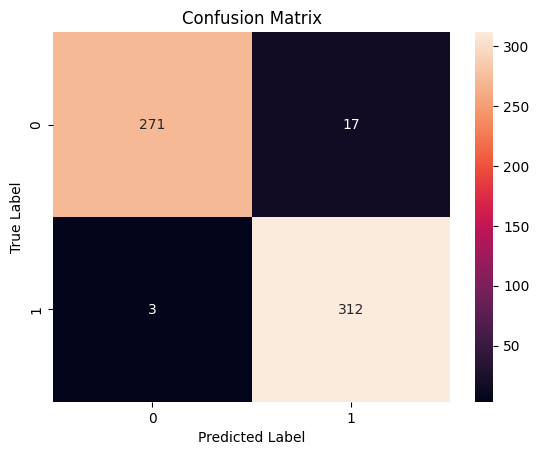

In [ ]:
# Confusion Matrix Multinomial Naive Bayes
class_label = ["0", "1"]
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Tahap Pengujian

In [ ]:
#Tahap Uji
data = ["sulit untuk login selalu keluar aplikasi sendiri",
        "daftar salah palsu data",
        "parah gara kusam aktivasi video panggil kali",
        "aplikasi error tidak bisa login terus",
        "aplikasi jenius terbaik UI UX simple memudahkan untuk topup ewallet kartu debit dan berlangganan netflix dan spotify"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)

In [ ]:
data_predict=pd.DataFrame({'Text':data, 'Prediction':my_pred})
data_predict.head(10)

,Text,Prediction
0,sulit untuk login selalu keluar aplikasi sendiri,negatif
1,daftar salah palsu data,negatif
2,parah gara kusam aktivasi video panggil kali,negatif
3,aplikasi error tidak bisa login terus,negatif
4,aplikasi jenius terbaik UI UX simple memudahka...,positif


In [ ]:
data_predict=pd.DataFrame(data)
data_predict.head(10)

,ulasan,prediction_class,label
0,parah gara kusam aktivasi video panggil kali,negatif,negatif
1,daftar salah pasu data,positif,negatif
2,pinjam uang jenius email kembali uang pinjam m...,negatif,negatif


# Gaussian Naive Bayes

In [ ]:
#Pemodelan Naive BAyes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier = GaussianNB().fit(x_train, y_train)
predicted = classifier.predict(x_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, predicted))
print("GaussianNB Precision:", precision_score(y_test, predicted, average="binary", pos_label=0))
print("GaussianNB Recall:", recall_score(y_test, predicted, average="binary", pos_label=0))
print("GaussianNB F1_Score:", f1_score(y_test, predicted, average="binary", pos_label=0))

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

GaussianNB Accuracy: 0.8938640132669984
GaussianNB Precision: 0.9444444444444444
GaussianNB Recall: 0.8263888888888888
GaussianNB F1_Score: 0.8814814814814814
confusion matrix:
 [[238  50]
 [ 14 301]]

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       288
           1       0.86      0.96      0.90       315

    accuracy                           0.89       603
   macro avg       0.90      0.89      0.89       603
weighted avg       0.90      0.89      0.89       603



In [ ]:
#Pemodelan Naive BAyes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier = GaussianNB().fit(x_train, y_train)
predicted = classifier.predict(x_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, predicted))
print("GaussianNB Precision:", precision_score(y_test, predicted, average="binary", pos_label=1))
print("GaussianNB Recall:", recall_score(y_test, predicted, average="binary", pos_label=1))
print("GaussianNB F1_Score:", f1_score(y_test, predicted, average="binary", pos_label=1))

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

GaussianNB Accuracy: 0.8938640132669984
GaussianNB Precision: 0.8575498575498576
GaussianNB Recall: 0.9555555555555556
GaussianNB F1_Score: 0.903903903903904
confusion matrix:
 [[238  50]
 [ 14 301]]

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       288
           1       0.86      0.96      0.90       315

    accuracy                           0.89       603
   macro avg       0.90      0.89      0.89       603
weighted avg       0.90      0.89      0.89       603



In [ ]:
classifier = GaussianNB().fit(x_train, y_train)
predicted = classifier.predict(x_test)
predicted

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,

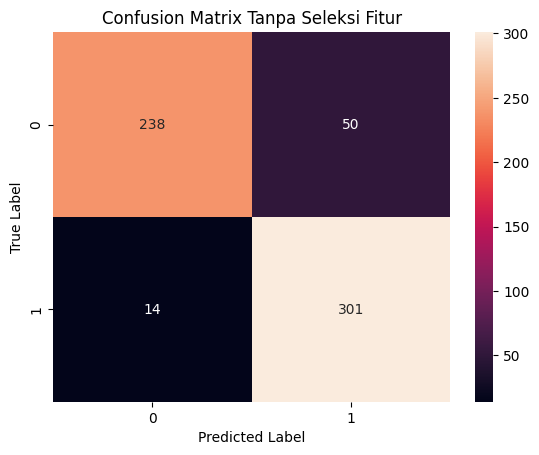

In [ ]:
# Confusion Matrix Gaussian Naive Bayes
class_label = ["0", "1"]
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix Tanpa Seleksi Fitur")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Menghitung Nilai Akurasi, Presisi, Recall, F1-Score

TP = 301
TN = 238
FP = 50
FN = 14

accuracy= (TN+TP)/(TN+TP+FN+FP)
precision= TP/(TP+FP)
recall= TP/(TP+FN)
f1meas= (2*precision*recall)/(precision+recall)
print("nilai akurasi adalah",accuracy)
print("nilai precision adalah",precision)
print("nilai recall adalah",recall)
print("nilai f1-score adalah",f1meas)

nilai akurasi adalah 0.8938640132669984
nilai precision adalah 0.8575498575498576
nilai recall adalah 0.9555555555555556
nilai f1-score adalah 0.903903903903904


# SMOTE

In [ ]:
#import SMOTE module from imblearn library
!pip install imblearn

#Oversampling
print("Before Oversampling, counts of label 'positif' : {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'negatif' : {}".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After Oversampling, the shape of train_x: {}'.format(x_train_res.shape))
print('After Oversampling, the shape of train_y: {}\n'.format(y_train_res.shape))

print("After Oversampling, counts of label 'positif' : {}".format(sum(y_train_res == 1)))
print("After Oversampling, counts of label 'negatif' : {}".format(sum(y_train_res == 0)))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Before Oversampling, counts of label 'positif' : 1395
Before Oversampling, counts of label 'negatif' : 1395
After Oversampling, the shape of train_x: (2790, 1700)
After Oversampling, the shape of train_y: (2790,)

After Oversampling, counts of label 'positif' : 1395
After Oversampling, counts of label 'negatif' : 1395


# PSO Gaussian NB

In [ ]:
pip install --upgrade pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
import pyswarms as ps

In [ ]:
def f_per_particle(mask, classifier):
    #""" Computes for the objective function per particle

    #Parameters
    #----------
    #mask : numpy.ndarray
    #    Binary mask that can be obtained from BinaryPSO, will be used to mask features

    #alpha : float, default: 0.5
    #    Constant weight for trading-off classifier performance and number of features

    #Returns
    #-------
    #numpy.ndarray
    #    Computed objective function
    #"""

    total_features = x_train.shape[1]
    # Get the subset of the features from the binary mask
    m = mask.copy()
    if np.count_nonzero(m) == 0:
        m = np.ones(mask.shape, dtype=np.int)
    classifier.fit(x_train[:, m==1], y_train)

    # Compute for the objective function
    objective_value = 1 - classifier.score(x_test[:, m==1], y_test)
    return objective_value

In [ ]:
def f(x):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], classifier=GaussianNB()) for i in range(n_particles)]
    return np.array(j)

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=50)

2023-06-06 03:14:47,300 - pyswarms.discrete.binary - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|50/50, best_cost=0.113
2023-06-06 03:16:36,553 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.1127694859038143, best pos: [0 0 1 ... 0 0 0]


In [ ]:
cost

0.1127694859038143

In [ ]:
classifier.fit(x_train[:, pos==1], y_train)

GaussianNB()

In [ ]:
accuracy = classifier.score(x_test[:, pos==1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 88.72305140961856%


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 969


**PSO 100 iters**

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=100)
cost

2023-06-06 03:18:09,514 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0.111
2023-06-06 03:21:31,413 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.11111111111111116, best pos: [1 1 1 ... 1 1 0]


0.11111111111111116

In [ ]:
classifier.fit(x_train[:, pos==1], y_train)

GaussianNB()

In [ ]:
accuracy = classifier.score(x_test[:, pos==1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 89.88391376451078%


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 884


**250 Iters**

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=250)
cost

2023-06-06 03:31:04,698 - pyswarms.discrete.binary - INFO - Optimize for 250 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|250/250, best_cost=0.104
2023-06-06 03:38:11,208 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.10447761194029848, best pos: [0 1 1 ... 1 0 0]


0.10447761194029848

In [ ]:
classifier.fit(x_train[:, pos==1], y_train)

GaussianNB()

In [ ]:
accuracy = classifier.score(x_test[:, pos==1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 89.55223880597015%


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 859


**500 iters**

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=500)
cost

2023-06-06 03:42:56,639 - pyswarms.discrete.binary - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|500/500, best_cost=0.106
2023-06-06 03:59:01,447 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.10613598673300162, best pos: [1 0 1 ... 1 1 0]


0.10613598673300162

In [ ]:
classifier.fit(x_train[:, pos==1], y_train)

GaussianNB()

In [ ]:
accuracy = classifier.score(x_test[:, pos==1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 89.38640132669984%


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 856


**800** Iters

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=800)
cost

2023-06-06 04:00:25,371 - pyswarms.discrete.binary - INFO - Optimize for 800 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|800/800, best_cost=0.0945
2023-06-06 04:24:53,195 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.09452736318407962, best pos: [0 1 1 ... 1 1 0]


0.09452736318407962

In [ ]:
classifier = GaussianNB().fit(x_train[:, pos==1], y_train)

In [ ]:
accuracy = classifier.score(x_test[:, pos==1], y_test)
precision = classifier.score(x_test[:, pos==1], y_test, predicted)
print('Accuracy: {}%'.format(accuracy * 100))
print("GaussianNB Precision:", precision_score(y_test, predicted, average="binary", pos_label=0))
print("GaussianNB Recall:", recall_score(y_test, predicted, average="binary", pos_label=0))
print("GaussianNB F1_Score:", f1_score(y_test, predicted, average="binary", pos_label=0))

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

Accuracy: 90.54726368159204%
GaussianNB Precision: 0.9444444444444444
GaussianNB Recall: 0.8263888888888888
GaussianNB F1_Score: 0.8814814814814814
confusion matrix:
 [[238  50]
 [ 14 301]]

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       288
           1       0.86      0.96      0.90       315

    accuracy                           0.89       603
   macro avg       0.90      0.89      0.89       603
weighted avg       0.90      0.89      0.89       603



In [ ]:
accuracy = classifier.score(x_test[:, pos==1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 90.54726368159204%


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))
print(classification_report(y_test, predicted))

Number of features: 856


NameError: ignored

In [ ]:
X_test_vec = vectorizer.transform(X_test)
y_pred = clf.predict(x_test_vec)

In [ ]:
classifier = GaussianNB().fit(x_train, y_train)
predicted = classifier.predict(x_test)

# PSO Multinomial NB

In [ ]:
pip install --upgrade pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
def f_per_particle(mask, classifier):
    #""" Computes for the objective function per particle

    #Parameters
    #----------
    #mask : numpy.ndarray
    #    Binary mask that can be obtained from BinaryPSO, will be used to mask features

    #alpha : float, default: 0.5
    #    Constant weight for trading-off classifier performance and number of features

    #Returns
    #-------
    #numpy.ndarray
    #    Computed objective function
    #"""

    total_features = x_train.shape[1]
    # Get the subset of the features from the binary mask
    m = mask.copy()
    if np.count_nonzero(m) == 0:
        m = np.ones(mask.shape, dtype=np.int)
    classifier.fit(x_train[:, m==1], y_train)

    # Compute for the objective function
    objective_value = 1 - classifier.score(x_test[:, m==1], y_test)
    return objective_value

def f(x):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], classifier=MultinomialNB()) for i in range(n_particles)]
    return np.array(j)

In [ ]:
import pyswarms as ps

In [ ]:
pip install --upgrade pyswarms
import pyswarms as ps

def f_per_particle(mask, classifier):
    total_features = x_train.shape[1]
    # Untuk dapat subset fitur dari binary mask
    m = mask.copy()
    if np.count_nonzero(m) == 0:
        m = np.ones(mask.shape, dtype=np.int)
    classifier.fit(x_train[:, m==1], y_train)

    # Hitung objektive Value
    objective_value = 1 - classifier.score(x_test[:, m==1], y_test)
    return objective_value

def f(x):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], classifier=MultinomialNB()) for i in range(n_particles)]
    return np.array(j)

In [ ]:
def f(x):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], classifier=MultinomialNB()) for i in range(n_particles)]
    return np.array(j)

# Update Partikel dan learning Rates

**50 Iters**

In [ ]:
options = {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=50)

2023-06-11 23:47:52,864 - pyswarms.discrete.binary - INFO - Optimize for 50 iters with {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|50/50, best_cost=0.0216
2023-06-11 23:48:58,107 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.021558872305140975, best pos: [1 1 1 ... 0 1 0]


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 893


In [ ]:
#Naive Bayes Classifier
classifier = MultinomialNB().fit(x_train[:, pos==1], y_train)
y_pred_optimized = classifier.predict(x_test[:, pos==1])

# Calculate evaluation metrics for the optimized classifier
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='binary')
recall_optimized = recall_score(y_test, y_pred_optimized, average='binary')
f1_optimized = f1_score(y_test, y_pred_optimized, average='binary')

# Print the evaluation metrics for the optimized classifier
print("\nEvaluation Metrics for Optimized Classifier:")
print("Accuracy:", accuracy_optimized)
print("Precision:", precision_optimized)
print("Recall:", recall_optimized)
print("F1 Score:", f1_optimized)

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred_optimized)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))


Evaluation Metrics for Optimized Classifier:
Accuracy: 0.978441127694859
Precision: 0.968944099378882
Recall: 0.9904761904761905
F1 Score: 0.979591836734694
confusion matrix:
 [[278  10]
 [  3 312]]

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       288
           1       0.95      0.99      0.97       315

    accuracy                           0.97       603
   macro avg       0.97      0.97      0.97       603
weighted avg       0.97      0.97      0.97       603



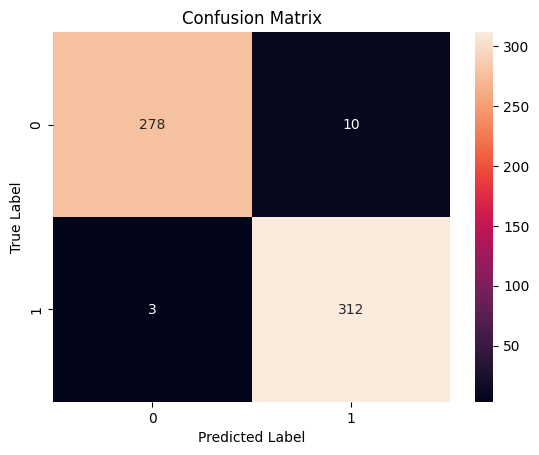

In [ ]:
# Confusion Matrix Multinomial Naive Bayes
class_label = ["0", "1"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_optimized), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**100 Iters**

In [ ]:
options = {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=100)

2023-06-11 23:49:40,577 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0.0216
2023-06-11 23:51:08,145 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.021558872305140975, best pos: [0 1 1 ... 1 0 0]


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 876


In [ ]:
#Pemodelan Naive Bayes
classifier = MultinomialNB().fit(x_train[:, pos==1], y_train)
y_pred_optimized = classifier.predict(x_test[:, pos==1])

# Calculate evaluation metrics for the optimized classifier
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='binary')
recall_optimized = recall_score(y_test, y_pred_optimized, average='binary')
f1_optimized = f1_score(y_test, y_pred_optimized, average='binary')

# Print the evaluation metrics for the optimized classifier
print("\nEvaluation Metrics for Optimized Classifier:")
print("Accuracy:", accuracy_optimized)
print("Precision:", precision_optimized)
print("Recall:", recall_optimized)
print("F1 Score:", f1_optimized)

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred_optimized)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))


Evaluation Metrics for Optimized Classifier:
Accuracy: 0.978441127694859
Precision: 0.9660493827160493
Recall: 0.9936507936507937
F1 Score: 0.9796557120500782
confusion matrix:
 [[277  11]
 [  2 313]]

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       288
           1       0.95      0.99      0.97       315

    accuracy                           0.97       603
   macro avg       0.97      0.97      0.97       603
weighted avg       0.97      0.97      0.97       603



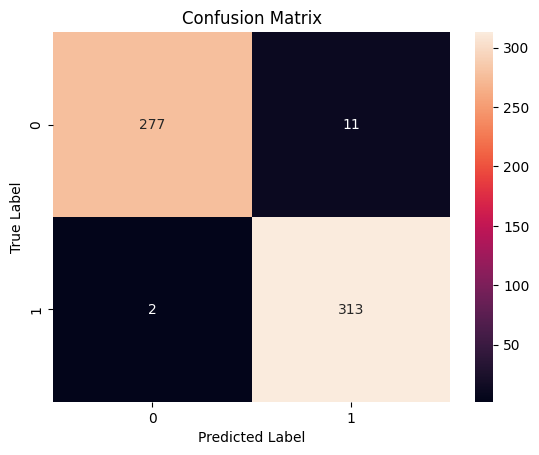

In [ ]:
# Confusion Matrix Multinomial Naive Bayes
class_label = ["0", "1"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_optimized), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**250 Iters**

In [ ]:
options = {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=250)

2023-06-11 23:53:01,579 - pyswarms.discrete.binary - INFO - Optimize for 250 iters with {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|250/250, best_cost=0.0199
2023-06-11 23:56:56,045 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.01990049751243783, best pos: [1 0 0 ... 1 0 0]


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 883


In [ ]:
#Pemodelan Naive Bayes
classifier = MultinomialNB().fit(x_train[:, pos==1], y_train)
y_pred_optimized = classifier.predict(x_test[:, pos==1])

# Calculate evaluation metrics for the optimized classifier
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='binary')
recall_optimized = recall_score(y_test, y_pred_optimized, average='binary')
f1_optimized = f1_score(y_test, y_pred_optimized, average='binary')

# Print the evaluation metrics for the optimized classifier
print("\nEvaluation Metrics for Optimized Classifier:")
print("Accuracy:", accuracy_optimized)
print("Precision:", precision_optimized)
print("Recall:", recall_optimized)
print("F1 Score:", f1_optimized)

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred_optimized)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))


Evaluation Metrics for Optimized Classifier:
Accuracy: 0.9800995024875622
Precision: 0.9690402476780186
Recall: 0.9936507936507937
F1 Score: 0.9811912225705328
confusion matrix:
 [[278  10]
 [  2 313]]

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       288
           1       0.95      0.99      0.97       315

    accuracy                           0.97       603
   macro avg       0.97      0.97      0.97       603
weighted avg       0.97      0.97      0.97       603



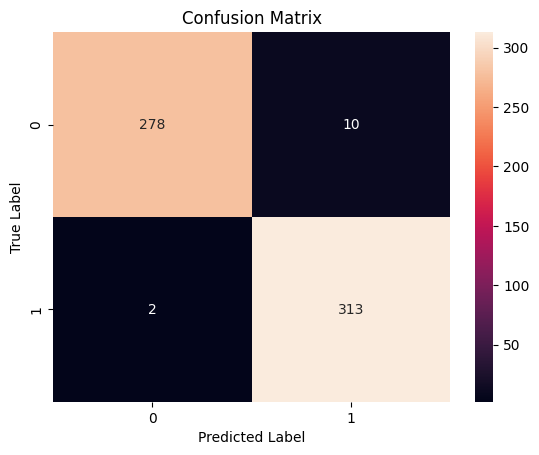

In [ ]:
# Confusion Matrix Multinomial Naive Bayes
class_label = ["0", "1"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_optimized), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**500 Iters**

In [ ]:
options = {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=500)

2023-06-11 23:57:23,143 - pyswarms.discrete.binary - INFO - Optimize for 500 iters with {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|500/500, best_cost=0.0166
2023-06-12 00:04:41,419 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.016583747927031545, best pos: [0 1 0 ... 0 1 0]


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 882


In [ ]:
#Pemodelan Naive Bayes
classifier = MultinomialNB().fit(x_train[:, pos==1], y_train)
y_pred_optimized = classifier.predict(x_test[:, pos==1])

# Calculate evaluation metrics for the optimized classifier
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='binary')
recall_optimized = recall_score(y_test, y_pred_optimized, average='binary')
f1_optimized = f1_score(y_test, y_pred_optimized, average='binary')

# Print the evaluation metrics for the optimized classifier
print("\nEvaluation Metrics for Optimized Classifier:")
print("Accuracy:", accuracy_optimized)
print("Precision:", precision_optimized)
print("Recall:", recall_optimized)
print("F1 Score:", f1_optimized)

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred_optimized)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))


Evaluation Metrics for Optimized Classifier:
Accuracy: 0.9834162520729685
Precision: 0.9780564263322884
Recall: 0.9904761904761905
F1 Score: 0.9842271293375394
confusion matrix:
 [[281   7]
 [  3 312]]

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       288
           1       0.95      0.99      0.97       315

    accuracy                           0.97       603
   macro avg       0.97      0.97      0.97       603
weighted avg       0.97      0.97      0.97       603



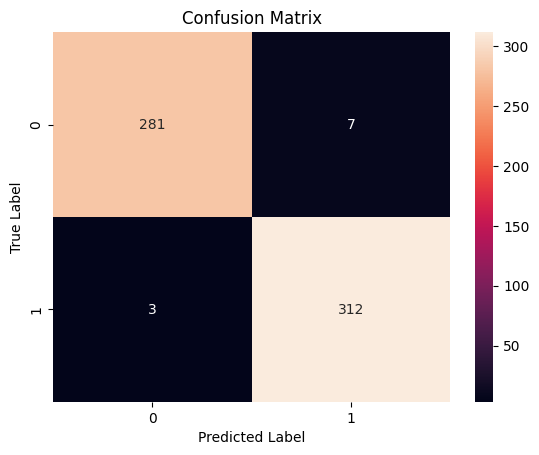

In [ ]:
# Confusion Matrix Multinomial Naive Bayes
class_label = ["0", "1"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_optimized), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**800 Iters**

In [ ]:
options = {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=800)

2023-06-12 00:05:08,154 - pyswarms.discrete.binary - INFO - Optimize for 800 iters with {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|800/800, best_cost=0.0149
2023-06-12 00:16:49,826 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.014925373134328401, best pos: [1 0 0 ... 1 1 0]


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 907


In [ ]:
#Pemodelan Naive Bayes
classifier = MultinomialNB().fit(x_train[:, pos==1], y_train)
y_pred_optimized = classifier.predict(x_test[:, pos==1])

# Calculate evaluation metrics for the optimized classifier
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='binary')
recall_optimized = recall_score(y_test, y_pred_optimized, average='binary')
f1_optimized = f1_score(y_test, y_pred_optimized, average='binary')

# Print the evaluation metrics for the optimized classifier
print("\nEvaluation Metrics for Optimized Classifier:")
print("Accuracy:", accuracy_optimized)
print("Precision:", precision_optimized)
print("Recall:", recall_optimized)
print("F1 Score:", f1_optimized)

## Classification Report
print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred_optimized)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))


Evaluation Metrics for Optimized Classifier:
Accuracy: 0.9850746268656716
Precision: 0.978125
Recall: 0.9936507936507937
F1 Score: 0.9858267716535434
confusion matrix:
 [[281   7]
 [  2 313]]

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       288
           1       0.95      0.99      0.97       315

    accuracy                           0.97       603
   macro avg       0.97      0.97      0.97       603
weighted avg       0.97      0.97      0.97       603



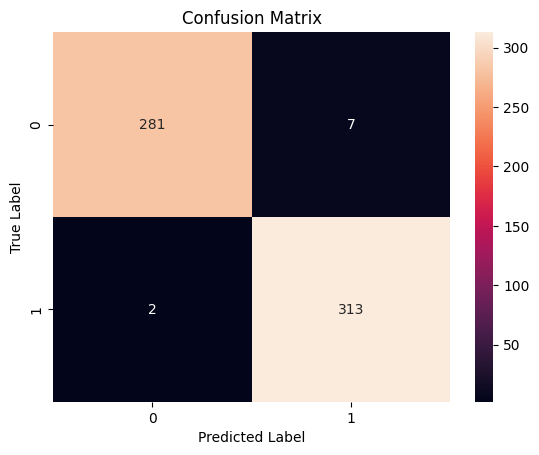

In [ ]:
# Confusion Matrix Multinomial Naive Bayes
class_label = ["0", "1"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_optimized), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 100 iters

**PSO 100 iters**

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=100)
cost

2023-06-06 23:20:35,452 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0.0315
2023-06-06 23:23:28,189 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.031509121061359835, best pos: [1 0 0 ... 1 0 0]


0.031509121061359835

In [ ]:
classifier.fit(x_train[:, pos==1], y_train)

MultinomialNB()

In [ ]:
accuracy = classifier.score(x_test[:, pos==1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 96.84908789386401%


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 891


**250 Iters**

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=250)
cost

2023-06-06 23:24:42,170 - pyswarms.discrete.binary - INFO - Optimize for 250 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|250/250, best_cost=0.0282
2023-06-06 23:29:50,867 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.028192371475953548, best pos: [0 1 1 ... 0 1 0]


0.028192371475953548

In [ ]:
classifier.fit(x_train[:, pos==1], y_train)

MultinomialNB()

In [ ]:
accuracy = classifier.score(x_test[:, pos==1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 97.18076285240464%


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 854


**500 iters**

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=500)
cost

2023-06-06 23:40:41,175 - pyswarms.discrete.binary - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|500/500, best_cost=0.0232
2023-06-06 23:51:09,803 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.023217247097844118, best pos: [0 1 0 ... 0 0 0]


0.023217247097844118

In [ ]:
classifier.fit(x_train[:, pos==1], y_train)

MultinomialNB()

In [ ]:
accuracy = classifier.score(x_test[:, pos==1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 97.6782752902156%


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 909


**800** Iters

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=800)
cost

2023-06-06 23:51:43,009 - pyswarms.discrete.binary - INFO - Optimize for 800 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|800/800, best_cost=0.0265
2023-06-07 00:08:13,621 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.026533996683250405, best pos: [0 0 0 ... 0 0 0]


0.026533996683250405

In [ ]:
classifier = MultinomialNB().fit(x_train[:, pos==1], y_train)

In [ ]:
accuracy = classifier.score(x_test[:, pos==1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 97.34660033167496%


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 897


**600 Iters**

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pso = ps.discrete.BinaryPSO(n_particles=30, dimensions=x_train.shape[1], options=options)
cost, pos = pso.optimize(f, iters=600)
cost

2023-06-07 00:45:57,061 - pyswarms.discrete.binary - INFO - Optimize for 600 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|600/600, best_cost=0.0265
2023-06-07 00:59:09,769 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.026533996683250405, best pos: [0 0 0 ... 0 0 1]


0.026533996683250405

In [ ]:
classifier = MultinomialNB().fit(x_train[:, pos==1], y_train)

In [ ]:
accuracy = classifier.score(x_test[:, pos==1], y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 97.34660033167496%


In [ ]:
print('Number of features: {}'.format(np.count_nonzero(pos)))

Number of features: 901


# Visualization

In [ ]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(data)} rows and {len(data.columns)} columns")
print(f"rating 1.0 = {len(data[data['Score']==1.0])} rows")
print(f"rating 2.0 = {len(data[data['Score']==2.0])} rows")
print(f"rating 3.0 = {len(data[data['Score']==3.0])} rows")
print(f"rating 4.0 = {len(data[data['Score']==4.0])} rows")
print(f"rating 5.0 = {len(data[data['Score']==5.0])} rows")

Input data has 3047 rows and 9 columns
rating 1.0 = 837 rows
rating 2.0 = 456 rows
rating 3.0 = 27 rows
rating 4.0 = 15 rows
rating 5.0 = 1712 rows


Input data has 3047 rows and 9 columns
negatif = 1337 rows
positif = 1710 rows


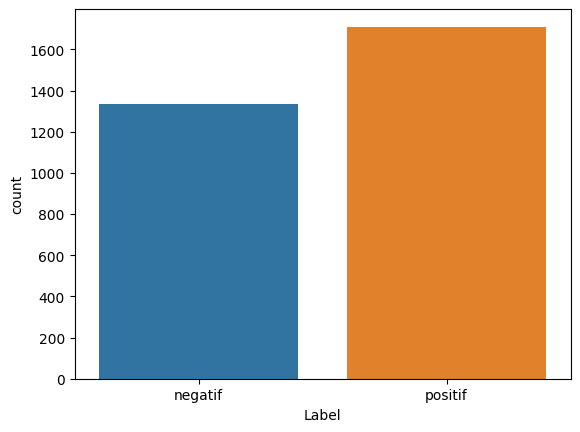

In [ ]:
print(f"Input data has {len(data)} rows and {len(data.columns)} columns")
print(f"negatif = {len(data[data['Label']=='negatif'])} rows")
print(f"positif = {len(data[data['Label']=='positif'])} rows")
sns.countplot(x='Label', data=data);

Text(0.5, 1.0, 'Perbandingan Label')

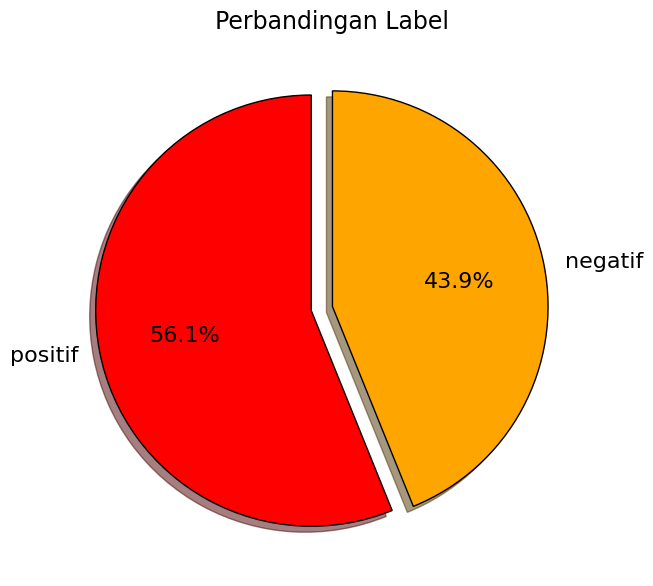

In [ ]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('red', 'orange')
wp={'linewidth':1, 'edgecolor': 'black'}
tags=data['Label'].value_counts()
explode = (0.1,0)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize':16},
startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Perbandingan Label', fontsize=17)

Number of null in label: 0
Number of null in text: 0
Number of null in label: 3047
Number of null in text: 3047


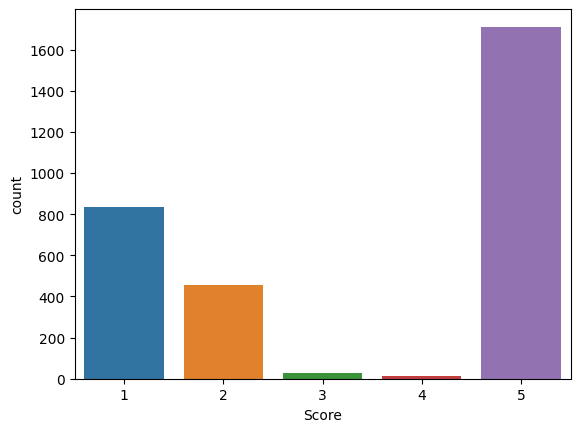

In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { data['Score'].isnull().sum() }")
print(f"Number of null in text: { data['Content'].isnull().sum()}")
print(f"Number of null in label: { data['cleansing'].isnull().sum() }")
print(f"Number of null in text: { data['casefolding'].isnull().sum()}")
sns.countplot(x='Score', data=data);

# **Word Distribution**

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
ulasan = ' '.join(str(v) for v in data['ulasan_clean'])

In [ ]:
import nltk
nltk.download('punkt')

tokenize_ulasan = word_tokenize(ulasan)
tokenize_ulasan

In [ ]:
#Melihat 20 kata paling banyak digunakan
fqdist = FreqDist(tokenize_ulasan)
fqdist.most_common(25)

[('aplikasi', 2936),
 ('mudah', 2052),
 ('jenius', 1407),
 ('topup', 818),
 ('aktivasi', 739),
 ('fitur', 739),
 ('tabung', 717),
 ('bank', 699),
 ('wallet', 696),
 ('electronic', 670),
 ('banking', 603),
 ('mobile', 601),
 ('bantu', 596),
 ('bagus', 564),
 ('simpel', 547),
 ('netflix', 540),
 ('tidak', 532),
 ('spotify', 530),
 ('userinterface', 483),
 ('userexperience', 449),
 ('ribet', 430),
 ('videocall', 427),
 ('transaksi', 414),
 ('keren', 390),
 ('login', 383)]

# **Wordcloud**

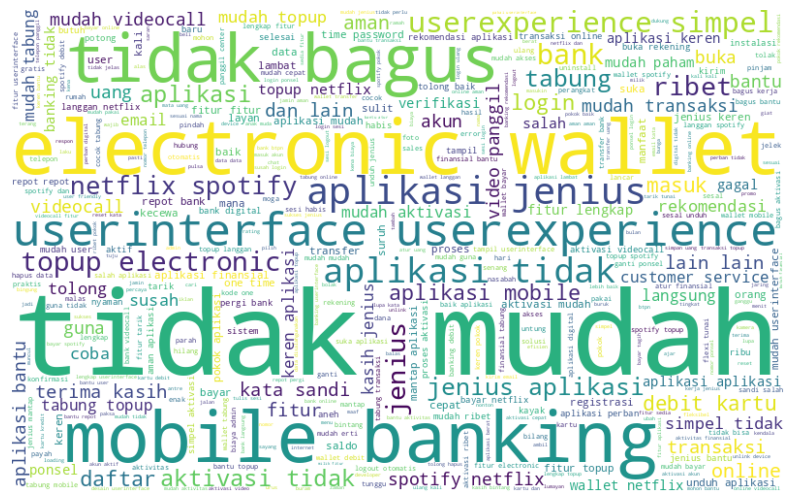

In [ ]:
from wordcloud import WordCloud

def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, max_words=400,
    background_color='white', random_state=21, max_font_size=130).generate(words)

    plt.figure(figsize=(10,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

all_words = ' '.join([text for text in data['ulasan_clean']])
wordCloud(all_words)

## Wordcloud Positive Words

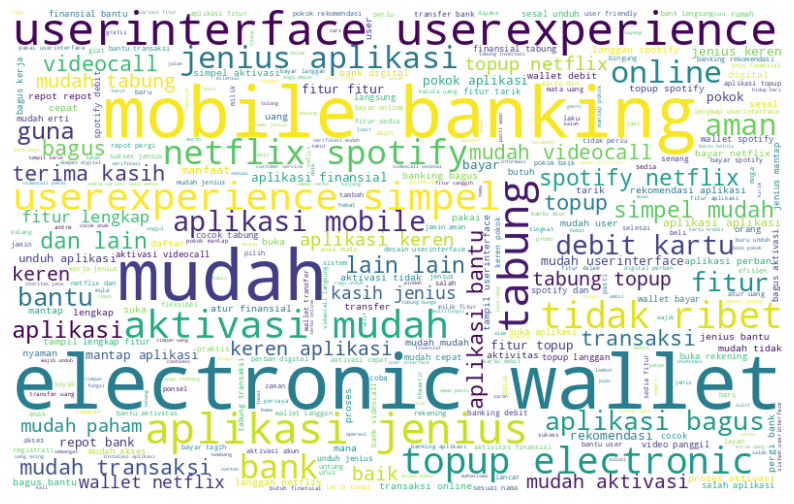

In [ ]:
from wordcloud import WordCloud

def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, max_words=350,
    background_color='white', random_state=21, max_font_size=130).generate(words)

    plt.figure(figsize=(10,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

positive_words = ' '.join(text for text in data['ulasan_clean'][data['Label'] == 'positif'])
wordCloud(positive_words)

In [ ]:
tokenize_positive_words = word_tokenize(positive_words)
tokenize_positive_words

['senang',
 'aplikasi',
 'keren',
 'coba',
 'menyicil',
 'barang',
 'toko',
 'online',
 'kartu',
 'jenius',
 'aplikasi',
 'bagus',
 'markotop',
 'cara',
 'seluruh',
 'active',
 'balance',
 'halaman',
 'masuk',
 'sembunyi',
 'mohon',
 'tambah',
 'fitur',
 'opsi',
 'sembunyi',
 'terima',
 'kasih',
 'aplikasi',
 'banking',
 'mudah',
 'tampil',
 'tarik',
 'aktivasi',
 'mudah',
 'videocall',
 'jenius',
 'mobile',
 'perban',
 'bagus',
 'mohon',
 'proses',
 'pindah',
 'device',
 'sederhana',
 'proses',
 'bantu',
 'mudah',
 'transaksi',
 'belanja',
 'dan',
 'lain',
 'lain',
 'terang',
 'temu',
 'sistem',
 'aman',
 'bank',
 'jenius',
 'sulit',
 'retas',
 'sulit',
 'unlink',
 'device',
 'logout',
 'reset',
 'ganti',
 'perangkat',
 'jenius',
 'bank',
 'btpn',
 'bantu',
 'canggih',
 'fitur',
 'salah',
 'dana',
 'siaga',
 'sedia',
 'flexi',
 'tunai',
 'rekomendasi',
 'simpel',
 'proses',
 'mudah',
 'cepat',
 'bagus',
 'aplikasi',
 'orang',
 'malas',
 'pergi',
 'mesin',
 'kayak',
 'transaksi',
 'ban

In [ ]:
#Melihat 10 kata paling banyak digunakan dalam sentimen positif
fqdist_positive_words = FreqDist(tokenize_positive_words)
fqdist_positive_words.most_common(20)

[('aplikasi', 2290),
 ('mudah', 1994),
 ('jenius', 1062),
 ('topup', 796),
 ('fitur', 693),
 ('tabung', 688),
 ('wallet', 680),
 ('electronic', 657),
 ('aktivasi', 656),
 ('mobile', 587),
 ('banking', 585),
 ('bank', 553),
 ('simpel', 541),
 ('netflix', 540),
 ('bantu', 532),
 ('spotify', 530),
 ('bagus', 477),
 ('userinterface', 476),
 ('userexperience', 445),
 ('keren', 387)]

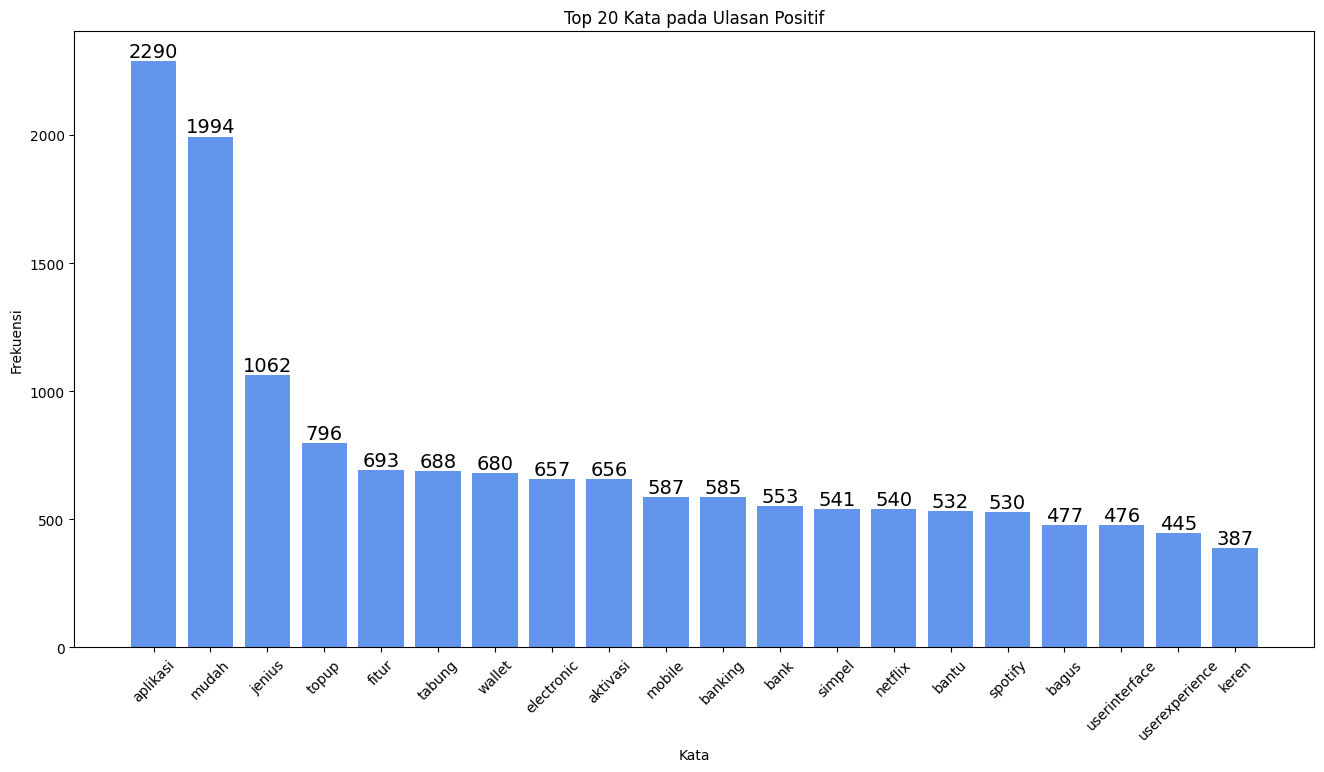

In [ ]:
#Visualisasi ke plot bar
plt.figure(figsize=(16,8))
top_words = fqdist_positive_words.most_common(20)
plt.bar([word[0] for word in top_words], [freq[1] for freq in top_words], color='#6495ED')
plt.title("Top 20 Kata pada Ulasan Positif")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)

# Menampilkan frekuensi di dalam bar
for i, freq in enumerate(top_words):
    plt.text(i, freq[1], str(freq[1]), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight': 'regular', 'size': 14})

plt.show()

## Wordcloud Negative Words

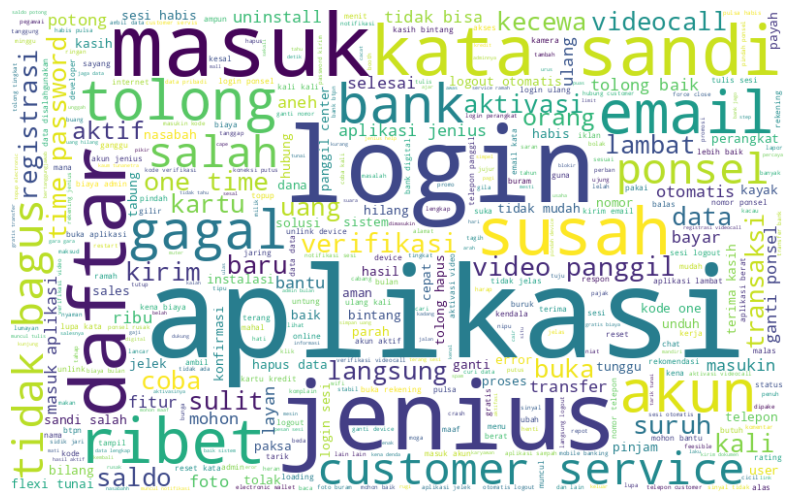

In [ ]:
negative_words = ' '.join(text for text in data['ulasan_clean'][data['Label'] == 'negatif'])
wordCloud(negative_words)

In [ ]:
tokenize_negative_words = word_tokenize(negative_words)
tokenize_negative_words

['parah',
 'gara',
 'kusam',
 'aktivasi',
 'video',
 'panggil',
 'kali',
 'daftar',
 'salah',
 'pasu',
 'data',
 'pinjam',
 'uang',
 'jenius',
 'email',
 'kembali',
 'uang',
 'pinjam',
 'menyalahgunakan',
 'data',
 'orang',
 'bawa',
 'hukum',
 'aplikasi',
 'ribet',
 'daftar',
 'masuk',
 'data',
 'data',
 'masuk',
 'aplikasi',
 'koneksi',
 'putus',
 'silah',
 'login',
 'ulang',
 'ulang',
 'login',
 'ambil',
 'data',
 'tagih',
 'tanggung',
 'tolong',
 'hapus',
 'data',
 'ke',
 'sini',
 'aplikasi',
 'lambat',
 'ganti',
 'device',
 'tidak',
 'bisa',
 'ribet',
 'telepon',
 'kesana',
 'kemari',
 'suruh',
 'tunggu',
 'ngabisin',
 'pulsa',
 'aplikasi',
 'bodoh',
 'bijak',
 'pindah',
 'ponsel',
 'device',
 'nama',
 'mudah',
 'sulit',
 'zaman',
 'digital',
 'bank',
 'aplikasi',
 'tidak',
 'mudah',
 'segi',
 'antarmuka',
 'sistem',
 'jenius',
 'bikin',
 'ribet',
 'saing',
 'bank',
 'mimpi',
 'denda',
 'ribu',
 'hati',
 'hati',
 'gagal',
 'transfer',
 'debet',
 'proses',
 'kerja',
 'jadi',
 'kali'

In [ ]:
#Melihat 20 kata paling banyak digunakan dalam sentimen negatif
fqdist_negative_words = FreqDist(tokenize_negative_words)
fqdist_negative_words.most_common(20)

[('aplikasi', 646),
 ('login', 381),
 ('jenius', 345),
 ('masuk', 274),
 ('data', 204),
 ('ponsel', 194),
 ('tolong', 189),
 ('sandi', 174),
 ('akun', 162),
 ('sesi', 161),
 ('daftar', 159),
 ('kata', 156),
 ('email', 153),
 ('bank', 146),
 ('susah', 139),
 ('kali', 126),
 ('panggil', 125),
 ('ribet', 125),
 ('salah', 124),
 ('baik', 121)]

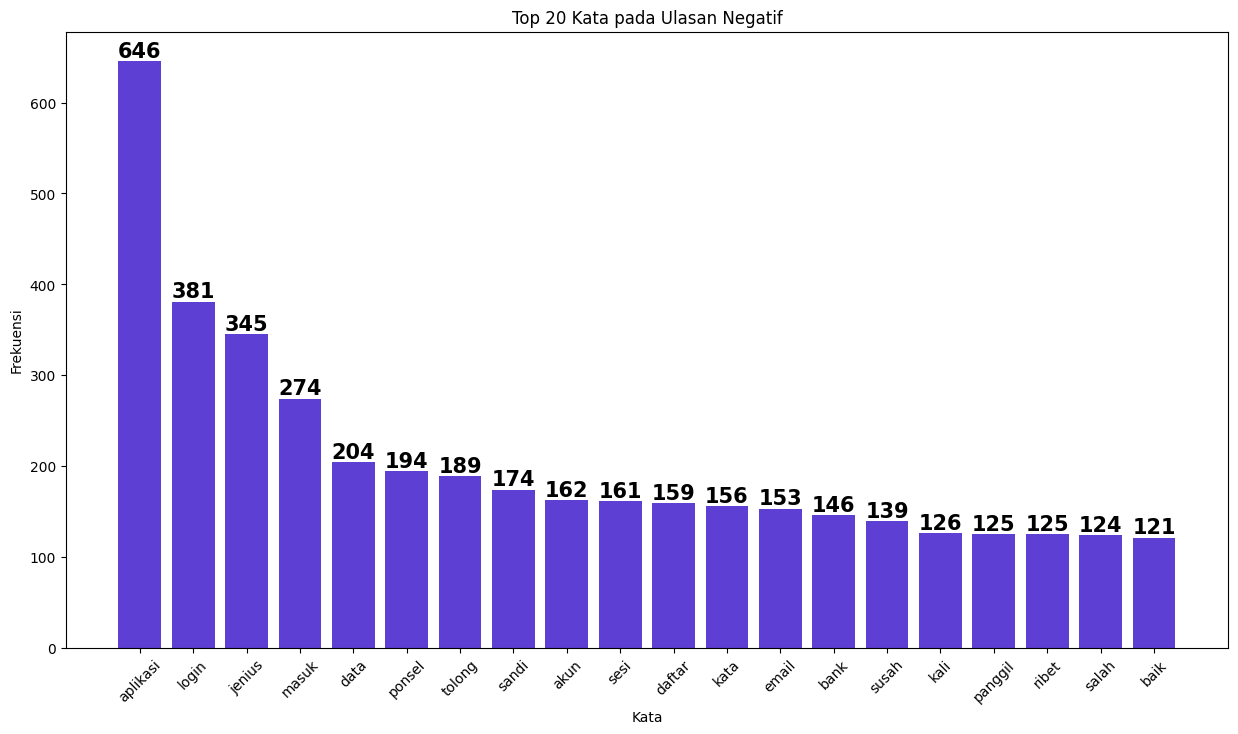

In [ ]:
## Find Top 20 Negative Review
plt.figure(figsize=(15,8))
top_words = fqdist_negative_words.most_common(20)
plt.bar([word[0] for word in top_words], [freq[1] for freq in top_words], color='#5D3FD3')
plt.title("Top 20 Kata pada Ulasan Negatif")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)

# Menampilkan frekuensi di dalam bar
for i, freq in enumerate(top_words):
    plt.text(i, freq[1], str(freq[1]), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight': 'bold', 'size': 15})

plt.show()